63 120
[0.0, 0.07302315063476517, 0.06572314929557355, 0.11345333256106176, 0.145581636441328, 0.2461442308558794, 0.2772577589382858, 0.2819151804133624, 0.2843063988957554, 0.29268114022170255, 0.28518380496028545, 0.27483561193596556, 0.2705560080304563, 0.2633528543935695, 0.25898106397891973, 0.25208598445972374, 0.2535530710154147, 0.25474076338159013, 0.2548593866941463, 0.2579851999002311, 0.2525438033696221, 0.24178402233903137, 0.2239842767023487, 0.20555017655287627, 0.20670994287927816, 0.2036293214532009, 0.19998116322242682, 0.2346967912319254, 0.2545113153955604, 0.2758760543117035, 0.2665214851767345, 0.2652656311736836, 0.2648551781426668, 0.2666209569297907, 0.27291460516246085, 0.26916921165690516, 0.269880068052082, 0.2607440245891866, 0.24954293113822465, 0.237243984911047, 0.2234594032954735, 0.21362126264906242, 0.21305829557419684, 0.22129754369201937, 0.22645510193304216, 0.2502000934014801, 0.3040349895343672, 0.6831405933345309, 0.9314645954354602, 1.01242183

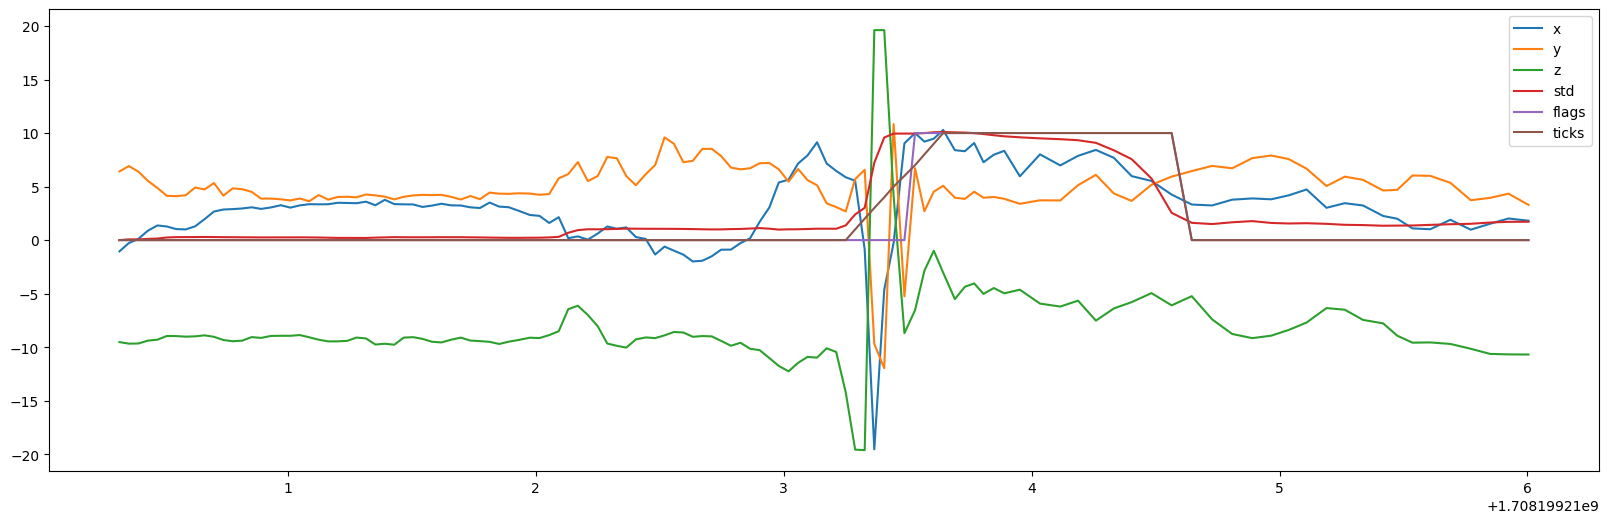

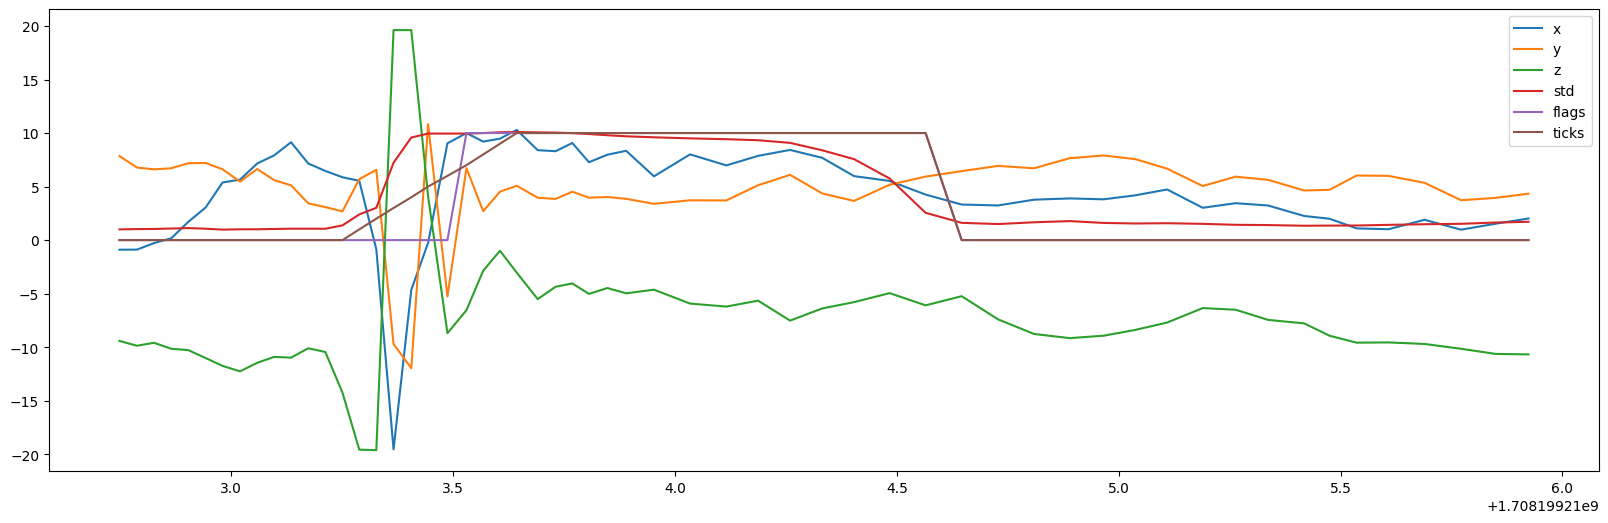

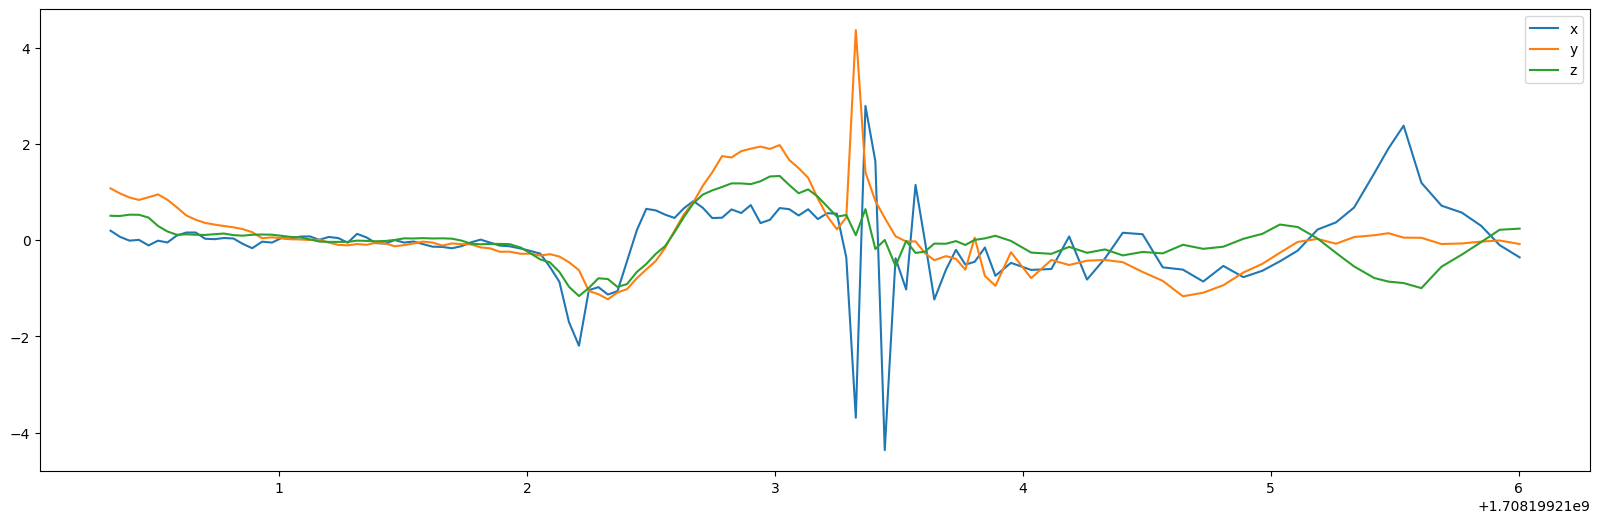

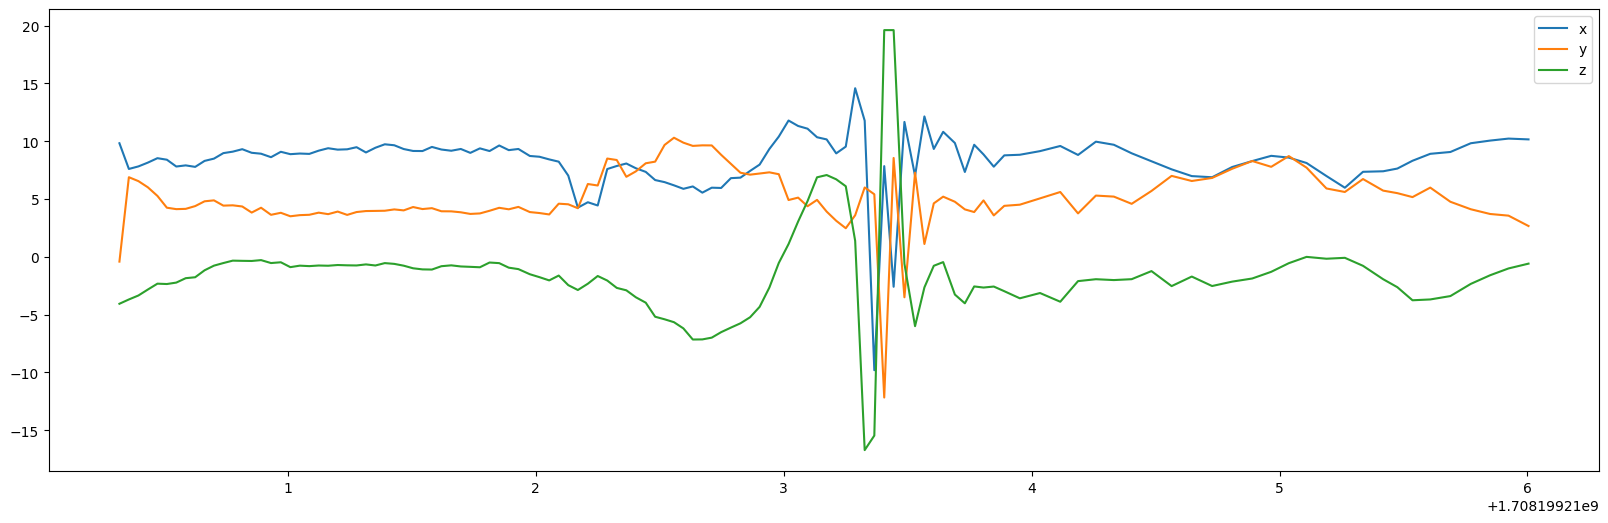

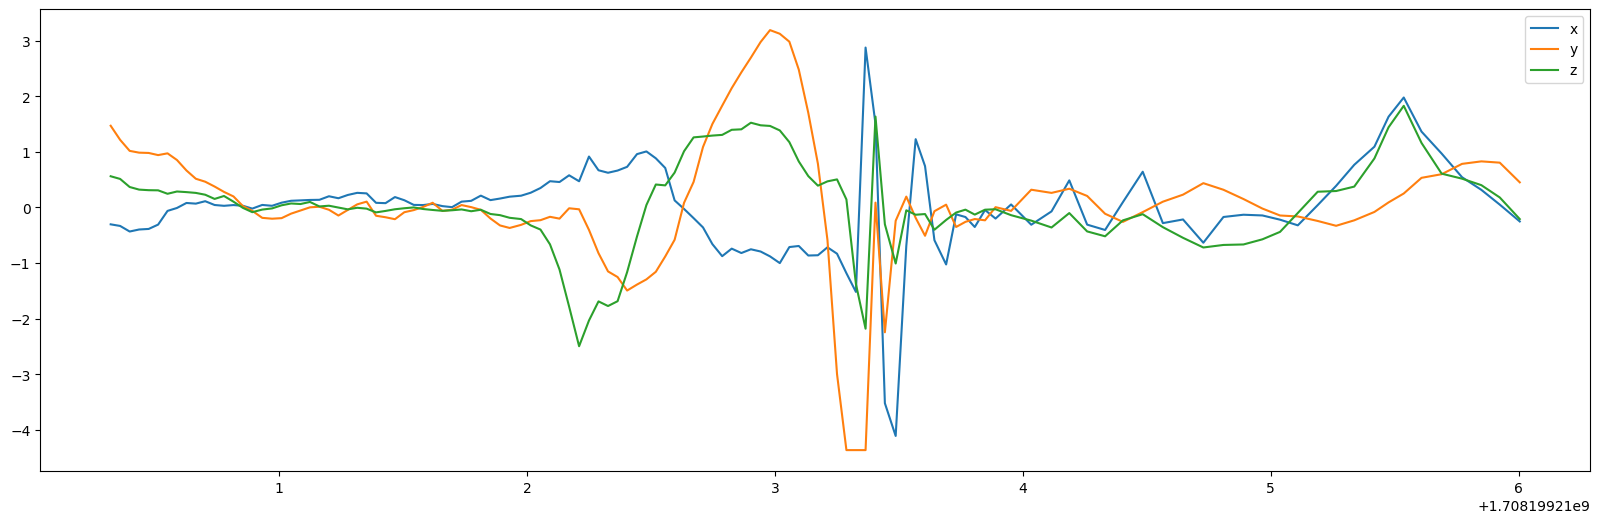

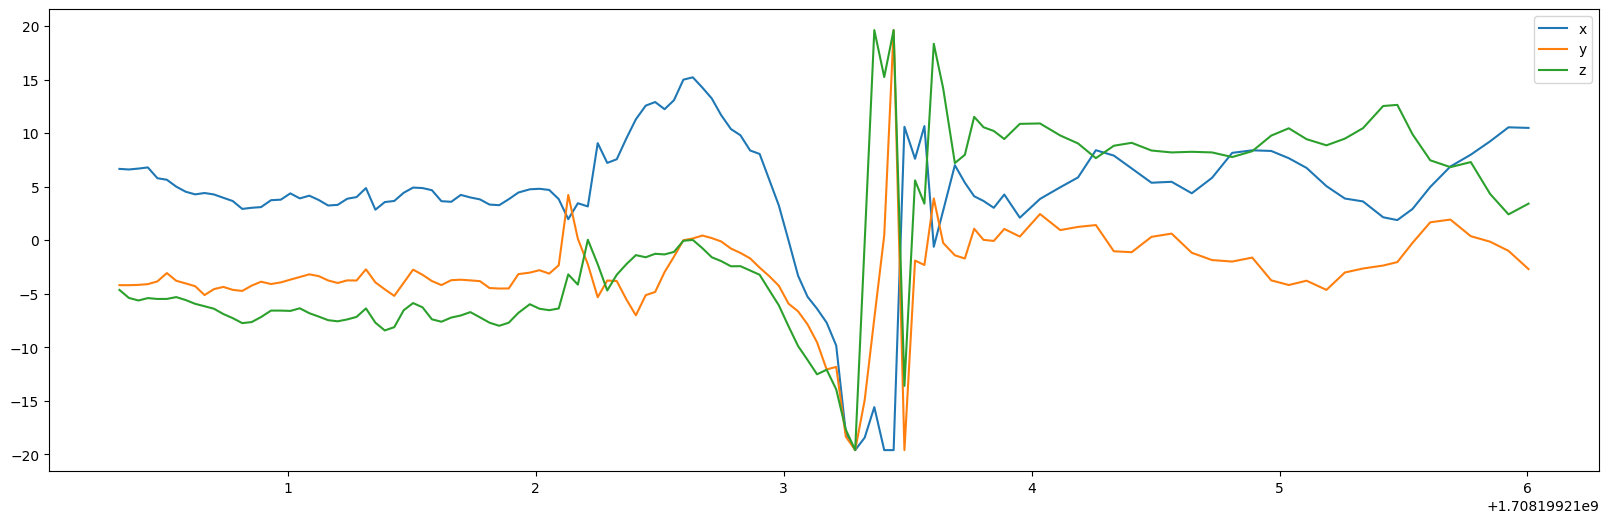

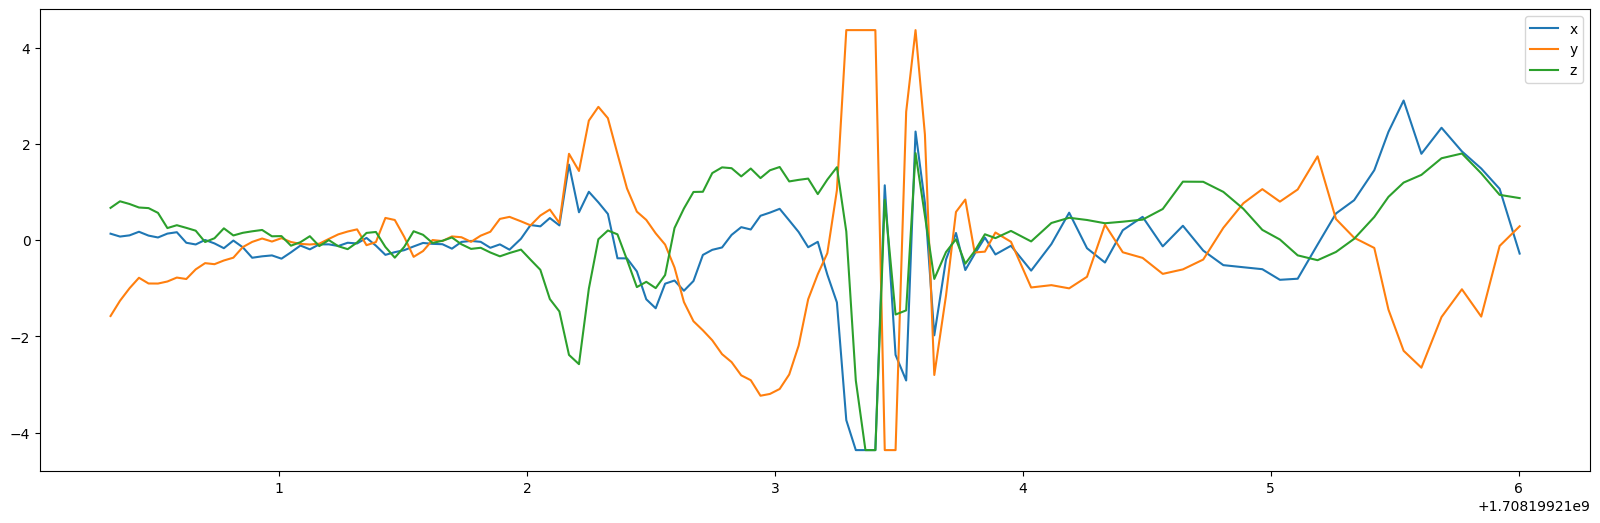

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 2 - forearm
# 3 - hand
# 4 - bicep
data = np.loadtxt(r"C:\Users\achen\Dropbox\code\treehacks10\put-me-in-coach\good_data\accel_data(2).csv", delimiter=",")
time = data[:,0]
col = list(data[:,15])

std_values_num = 20
off_tick = 0
flip_off = False
flip_on = False
flip_off_count = 0
idx_start = 0
idx_end = 0
flags = []
ticks = []

dtw_data = []
for idx in range(len(col)):
    std_dev_last_10 = np.std(col[max(0, idx-std_values_num):idx+1])
    if std_dev_last_10 > 2:
        off_tick = min(off_tick + 1, 10)
    else:
        off_tick = 0

    if off_tick > 6:
        flags.append(10)
        flip_on = True
        if idx_start == 0:
            idx_start = max(0, idx - 20)
    else:
        if flip_on:
            flip_off = True
        flags.append(0)

    if flip_off:
        flip_off_count += 1
    else:
        flip_off_count = 0

    if flip_off_count > 3:
        idx_end = idx
        # break

    ticks.append(off_tick)

print(idx_start, idx_end)

std_dev_last_10 = [np.std(col[max(0, i-std_values_num):i+1]) for i in range(len(col))]
print(std_dev_last_10)



plt.figure(figsize=(20,6))
plt.plot(time, data[:,13], label = "x")
plt.plot(time, data[:,14], label = "y")
plt.plot(time, data[:,15], label = "z")
plt.plot(time, std_dev_last_10, label = "std")
plt.plot(time, flags, label = "flags")
plt.plot(time, ticks, label = "ticks")

plt.legend()
plt.show()



plt.figure(figsize=(20,6))
plt.plot(time[idx_start:idx_end], data[idx_start:idx_end,13], label = "x")
plt.plot(time[idx_start:idx_end], data[idx_start:idx_end,14], label = "y")
plt.plot(time[idx_start:idx_end], data[idx_start:idx_end,15], label = "z")
plt.plot(time[idx_start:idx_end], std_dev_last_10[idx_start:idx_end], label = "std")
plt.plot(time[idx_start:idx_end], flags[idx_start:idx_end], label = "flags")
plt.plot(time[idx_start:idx_end], ticks[idx_start:idx_end], label = "ticks")

plt.legend()
plt.show()


plt.figure(figsize=(20,6))

plt.plot(time, data[:,16], label = "x")
plt.plot(time, data[:,17], label = "y")
plt.plot(time, data[:,18], label = "z")
plt.legend()
plt.show()


# print(time)
plt.figure(figsize=(20,6))
plt.plot(time, data[:,1], label = "x")
plt.plot(time, data[:,2], label = "y")
plt.plot(time, data[:,3], label = "z")
plt.legend()

plt.show()



plt.figure(figsize=(20,6))

plt.plot(time, data[:,4], label = "x")
plt.plot(time, data[:,5], label = "y")
plt.plot(time, data[:,6], label = "z")
plt.legend()

plt.show()



plt.figure(figsize=(20,6))
plt.plot(time, data[:,7], label = "x")
plt.plot(time, data[:,8], label = "y")
plt.plot(time, data[:,9], label = "z")
plt.legend()

plt.show()
plt.figure(figsize=(20,6))

plt.plot(time, data[:,10], label = "x")
plt.plot(time, data[:,11], label = "y")
plt.plot(time, data[:,12], label = "z")
plt.legend()

plt.show()